In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
worksheet = gc.open('eFEDS_VLASS_Simbad').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

index = [i[0] for i in rows[1:]]
adjusted_rows = [i[1:] for i in rows[1:]]

import pandas as pd
df = pd.DataFrame.from_records(adjusted_rows, columns=rows[0][1:], index=index)

df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
eFEDS J093700.9+010545,144.2538329,1.095920409,6.21E-12,144.2543591,1.095466302,4,-0.0712,0.0514,0.018,0.051,...,15.393069,4.24E-04,15.463301,4.89E-04,0.050684266,SECURE EXTRAGALACTIC,,,137,Seyfert_1
eFEDS J091453.4+042636,138.7228791,4.44338404,4.42E-12,138.7232072,4.442907678,4,55.9338,0.1607,-75.445,0.161,...,11.818934,0.0015543416,14.762686,0.018857492,,SECURE GALACTIC,,,83,SB*
eFEDS J085617.8-013805,134.0741705,-1.634745037,3.99E-12,134.0742909,-1.635378822,4,0.0241,0.1252,-0.077,0.153,...,15.390414,5.90E-04,14.928375,6.54E-04,0.05967131,SECURE EXTRAGALACTIC,,,26,Seyfert_1
eFEDS J084025.4+033302,130.1060962,3.55080893,3.09E-12,130.1063009,3.550497349,4,-0.0112,0.1106,0.041,0.108,...,16.7818,8.57E-04,16.917795,8.82E-04,0.060387,SECURE EXTRAGALACTIC,,,22,Seyfert_1
eFEDS J091639.7+004343,139.1654354,0.7287895713,2.03E-12,139.1645801,0.7274794535,2,,,,,...,16.775991,0.0011824907,16.449928,9.68E-04,,LIKELY GALACTIC,,,,


In [3]:
df.describe()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
count,27369,27369,27369,27369,27369,27369,27369,27369,27369,27369,...,27369,27369,27369,27369,27369,27369,27369,27369,27369,27369
unique,27365,27369,1656,27366,27366,5,7827,5904,5175,1977,...,27247,25975,27240,26456,6530,4,656,656,71,56
top,129.575849,1.095920409,1.02E-14,141.3231013,4.589785425,4,,,,,...,,,,,,LIKELY EXTRAGALACTIC,,,,
freq,2,1,256,2,2,20873,18609,18609,18609,18609,...,16,16,25,25,20498,19016,26714,26714,20737,20737


In [4]:
df.shape

(27369, 42)

In [5]:
import numpy as np
df = df.replace('',np.nan)

In [6]:
df.isnull().sum()

ERO_RA_CORR                    0
ERO_DEC_CORR                   0
ERO_ML_FLUX                    0
CTP_LS8_RA                     0
CTP_LS8_DEC                    0
CTP_quality                    0
GaiaEDR3_parallax          18609
GaiaEDR3_parallax_error    18609
GaiaEDR3_pmra              18609
GaiaEDR3_pmra_error        18609
GaiaEDR3_pmdec             18609
GaiaEDR3_pmdec_error       18609
FUV                        25136
FUV_ERR                    25136
NUV                        21579
NUV_ERR                    21579
VISTA_J                    14828
VISTA_J_ERR                14828
VISTA_H                    14861
VISTA_H_ERR                14861
VISTA_Ks                   14838
VISTA_Ks_ERR               14838
W1                           120
W1_ERR                       120
W2                           162
W2_ERR                       162
W3                          5688
W3_ERR                      5688
W4                         10021
W4_ERR                     10021
LS8_g     

In [7]:
df[df.columns[:-5]] = df[df.columns[:-5]].apply(pd.to_numeric)
df[df.columns[-4:-1]] = df[df.columns[-4:-1]].apply(pd.to_numeric)
df.dtypes

ERO_RA_CORR                float64
ERO_DEC_CORR               float64
ERO_ML_FLUX                float64
CTP_LS8_RA                 float64
CTP_LS8_DEC                float64
CTP_quality                  int64
GaiaEDR3_parallax          float64
GaiaEDR3_parallax_error    float64
GaiaEDR3_pmra              float64
GaiaEDR3_pmra_error        float64
GaiaEDR3_pmdec             float64
GaiaEDR3_pmdec_error       float64
FUV                        float64
FUV_ERR                    float64
NUV                        float64
NUV_ERR                    float64
VISTA_J                    float64
VISTA_J_ERR                float64
VISTA_H                    float64
VISTA_H_ERR                float64
VISTA_Ks                   float64
VISTA_Ks_ERR               float64
W1                         float64
W1_ERR                     float64
W2                         float64
W2_ERR                     float64
W3                         float64
W3_ERR                     float64
W4                  

In [8]:
df = df[df.CTP_quality>2]
df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
eFEDS J093700.9+010545,144.253833,1.095920,6.210000e-12,144.254359,1.095466,4,-0.0712,0.0514,0.018,0.051,...,15.393069,0.000424,15.463301,0.000489,0.050684,SECURE EXTRAGALACTIC,NaN,NaN,137.0,Seyfert_1
eFEDS J091453.4+042636,138.722879,4.443384,4.420000e-12,138.723207,4.442908,4,55.9338,0.1607,-75.445,0.161,...,11.818934,0.001554,14.762686,0.018857,NaN,SECURE GALACTIC,NaN,NaN,83.0,SB*
eFEDS J085617.8-013805,134.074171,-1.634745,3.990000e-12,134.074291,-1.635379,4,0.0241,0.1252,-0.077,0.153,...,15.390414,0.000590,14.928375,0.000654,0.059671,SECURE EXTRAGALACTIC,NaN,NaN,26.0,Seyfert_1
eFEDS J084025.4+033302,130.106096,3.550809,3.090000e-12,130.106301,3.550497,4,-0.0112,0.1106,0.041,0.108,...,16.781800,0.000857,16.917795,0.000882,0.060387,SECURE EXTRAGALACTIC,NaN,NaN,22.0,Seyfert_1
eFEDS J084441.9+004416,131.174734,0.737925,1.890000e-12,131.175092,0.737720,4,15.3973,0.0135,-108.139,0.016,...,10.091446,0.000401,12.566205,0.001924,NaN,SECURE GALACTIC,NaN,NaN,7.0,PM*


In [9]:
df.shape

(22256, 42)

In [10]:
def is_AGN(classification, ref):
  value = "Unknown"
  try:
    if classification in ["QSO", "Seyfert_1", "Seyfert_2", "BLLac", "Blazar", "RadioG", "AGN"] and ref>=3:
      return True
    elif pd.isna(classification):
      return value
    elif ref<3 or "Candidate" in classification:
      return value
    else:
      return False
  except Exception as e:
    print(e)
    print(classification, ref)
    input()

df["is_AGN"] = df.apply(lambda x: is_AGN(x.main_type, x.nbref), axis=1)
df.is_AGN.value_counts()

Unknown    18856
True        2726
False        674
Name: is_AGN, dtype: int64

In [11]:
df.main_type.unique()

array(['Seyfert_1', 'SB*', 'PM*', 'QSO', nan, 'Blazar', 'RotV*', 'RSCVn',
       'Star', 'Galaxy', 'BLLac', 'V*', 'LINER', 'BClG', 'AGN_Candidate',
       'GinCl', 'LPV*', '**', 'EB*', 'AGN', 'QSO_Candidate', 'Seyfert_2',
       'Radio', 'Blue', 'X', 'CataclyV*', 'RadioG', 'CV*_Candidate',
       'YSO_Candidate', 'Em*', 'EB*_Candidate', 'LensedImage', 'GinGroup',
       'Blazar_Candidate', 'PulsV*', 'Pec*', 'WD*_Candidate', 'ClG',
       'Radio(cm)', 'EllipVar', 'Seyfert', 'UV', 'EmG', 'low-mass*',
       'PairG', 'G_Candidate', 'GravLensSystem', 'RGB*',
       'Planet?_Candidate', 'WD*', 'brownD*_Candidate', 'LP*_Candidate'],
      dtype=object)

In [12]:
df = df[(abs(df["GaiaEDR3_parallax"]/df["GaiaEDR3_parallax_error"])<=3) | (df["GaiaEDR3_parallax"].isnull())]
df.shape

(20255, 43)

In [13]:
df = df[(abs(df.GaiaEDR3_pmra/df.GaiaEDR3_pmra_error)<=3) | df.GaiaEDR3_pmra.isnull()]
df.shape

(20139, 43)

In [14]:
df = df[(abs(df.GaiaEDR3_pmdec/df.GaiaEDR3_pmdec_error)<=3) | df.GaiaEDR3_pmdec.isnull()]
df.shape

(20086, 43)

In [15]:
from sklearn import metrics
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [16]:
df["log_FLUX"]=np.log10(df["ERO_ML_FLUX"])
df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type,is_AGN,log_FLUX
eFEDS J093700.9+010545,144.253833,1.095920,6.210000e-12,144.254359,1.095466,4,-0.0712,0.0514,0.018,0.051,...,15.463301,0.000489,0.050684,SECURE EXTRAGALACTIC,NaN,NaN,137.0,Seyfert_1,True,-11.206908
eFEDS J085617.8-013805,134.074171,-1.634745,3.990000e-12,134.074291,-1.635379,4,0.0241,0.1252,-0.077,0.153,...,14.928375,0.000654,0.059671,SECURE EXTRAGALACTIC,NaN,NaN,26.0,Seyfert_1,True,-11.399027
eFEDS J084025.4+033302,130.106096,3.550809,3.090000e-12,130.106301,3.550497,4,-0.0112,0.1106,0.041,0.108,...,16.917795,0.000882,0.060387,SECURE EXTRAGALACTIC,NaN,NaN,22.0,Seyfert_1,True,-11.510042
eFEDS J091702.3-004415,139.259589,-0.737505,1.510000e-12,139.259948,-0.738204,4,-0.0662,0.0749,0.019,0.083,...,16.181509,0.000732,0.322346,SECURE EXTRAGALACTIC,NaN,NaN,35.0,QSO,True,-11.821023
eFEDS J091400.3+050651,138.501628,5.114248,1.450000e-13,138.500844,5.114262,4,NaN,NaN,NaN,NaN,...,21.308126,0.052269,NaN,LIKELY EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,-12.838632


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

input_labels = ['LS8_g', 'LS8_r', "LS8_z", "W1", "W2", "W3", "W4", "log_FLUX", "is_AGN"]
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Regression_model = RandomForestClassifier(n_estimators = 500, random_state = 0)
Regression_model.fit(X_train, y_train)

y_pred = Regression_model.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.9161147902869757
Precision:  0.9323671497584541
Recall:  0.9747474747474747


In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier

known_df = df[df["is_AGN"] != "Unknown"]
known_df = known_df[input_labels]
y = known_df["is_AGN"].astype(int)
X = known_df.drop("is_AGN", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Hist_tree = HistGradientBoostingClassifier(early_stopping = True).fit(X_train, y_train)
y_pred2 = Hist_tree.predict(X_test)

model_stats(y_test, y_pred2)

Accuracy:  0.9373996789727127
Precision:  0.9452296819787986
Recall:  0.9852670349907919


In [19]:
def is_AGN(x):
  value = "Unknown"
  try:
    if x.main_type in ["QSO", "Seyfert_1", "Seyfert_2", "BLLac", "Blazar", "RadioG", "AGN"] and x.nbref>=3:
      return True
    elif x.CTP_Classification == "SECURE GALACTIC":
      return False
    elif abs(x.GaiaEDR3_pmra/x.GaiaEDR3_pmra_error)>=3 or abs(x.GaiaEDR3_pmdec/x.GaiaEDR3_pmdec_error)>=3 or abs(x.GaiaEDR3_parallax/x.GaiaEDR3_parallax_error)>=3:
      return False
    elif pd.isna(x.main_type):
      return value
    elif x.nbref<3 or "Candidate" in x.main_type:
      return value
    else:
      return False
  except Exception as e:
    print(e)
    print(x)
    input()


df = pd.DataFrame.from_records(adjusted_rows, columns=rows[0][1:], index=index)
df = df.replace('',np.nan)
df[df.columns[:-5]] = df[df.columns[:-5]].apply(pd.to_numeric)
df[df.columns[-4:-1]] = df[df.columns[-4:-1]].apply(pd.to_numeric)
df = df[df.CTP_quality>2]
df["is_AGN"] = df.apply(lambda x: is_AGN(x), axis=1)
df.is_AGN.value_counts()


Unknown    16883
True        2726
False       2647
Name: is_AGN, dtype: int64

In [20]:
def classifier(classification):
  if classification == "SECURE GALACTIC":
    return 0
  elif classification == "SECURE EXTRAGALACTIC":
    return 2
  else:
    return 1

df["classification"] = df.apply(lambda x: classifier(x.CTP_Classification), axis=1)
df.classification.value_counts()

1    15097
2     5100
0     2059
Name: classification, dtype: int64

In [21]:
df["log_FLUX"]=np.log10(df["ERO_ML_FLUX"])
input_labels = ['LS8_g', 'LS8_r', "LS8_z", "W1", "W2", "W3", "W4", "log_FLUX","classification", "is_AGN"]
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Regression_model = RandomForestClassifier(n_estimators = 500, random_state = 0)
Regression_model.fit(X_train, y_train)

y_pred = Regression_model.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.9546079779917469
Precision:  0.9525
Recall:  0.9645569620253165


In [ ]:
known_df = df[df["is_AGN"] != "Unknown"]
known_df = known_df[input_labels]
y = known_df["is_AGN"].astype(int)
X = known_df.drop("is_AGN", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Hist_tree = HistGradientBoostingClassifier(early_stopping = True).fit(X_train, y_train)
y_pred2 = Hist_tree.predict(X_test)

model_stats(y_test, y_pred2)

Accuracy:  0.9572093023255814
Precision:  0.9395509499136442
Recall:  0.9801801801801802


<Axes: xlabel='rate', ylabel='accuracy'>

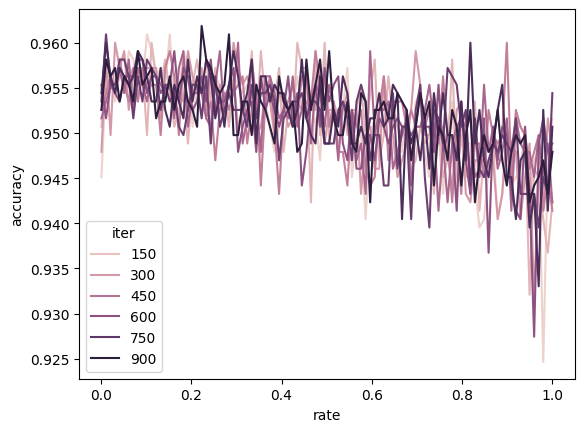

In [ ]:
metrics_dic = {"rate":[],"iter":[],"accuracy":[]}
for rate in np.linspace(0.001,1,100):
  for iter in range(100,1000,100):
    Hist_tree = HistGradientBoostingClassifier(early_stopping = True, learning_rate = rate, max_iter = iter).fit(X_train, y_train)
    y_pred = Hist_tree.predict(X_test)
    metrics_dic["rate"].append(rate)
    metrics_dic["iter"].append(iter)
    metrics_dic["accuracy"].append(metrics.accuracy_score(y_test, y_pred))

metrics_df=pd.DataFrame(metrics_dic)

import seaborn as sns

sns.lineplot(data = metrics_df, x="rate", y="accuracy", hue = "iter")

In [ ]:
metrics_df.sort_values("accuracy").tail()

,rate,iter,accuracy
260,0.283545,900,0.96093
90,0.101909,100,0.96093
15,0.011091,700,0.96093
135,0.152364,100,0.96093
206,0.223000,900,0.96186


In [ ]:
from sklearn.model_selection import GridSearchCV
model = HistGradientBoostingClassifier()
space = dict()
space["learning_rate"] = np.linspace(0.001,1,100)
space["max_iter"] = range(100,1000,100)
space['early_stopping'] = [True]
space["max_leaf_nodes"] = range(1,50,10)


search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1)
result = search.fit(X, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4500 fits failed out of a total of 22500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 353, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/l

Best Score: 0.9521723615261358
Best Hyperparameters: {'early_stopping': True, 'learning_rate': 0.021181818181818184, 'max_iter': 100, 'max_leaf_nodes': 21}


<Axes: xlabel='estimators', ylabel='accuracy'>

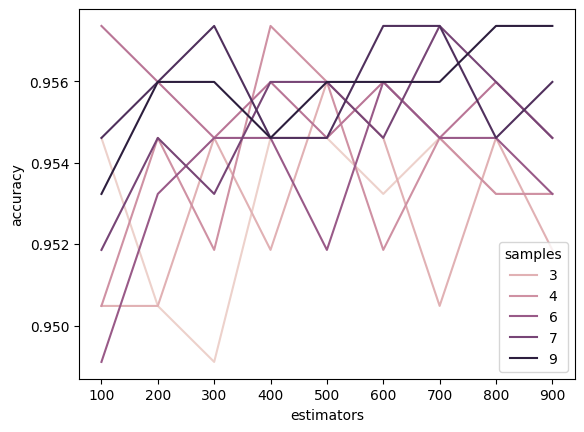

In [23]:
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

metrics_dic = {"samples":[],"estimators":[],"accuracy":[]}
for estimators in range(100,1000, 100):
  for samples in range(2,10):
    forest = RandomForestClassifier(n_estimators = estimators, min_samples_split = samples).fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    metrics_dic["samples"].append(samples)
    metrics_dic["estimators"].append(estimators)
    metrics_dic["accuracy"].append(metrics.accuracy_score(y_test, y_pred))

metrics_df=pd.DataFrame(metrics_dic)

import seaborn as sns

sns.lineplot(data = metrics_df, x="estimators", y="accuracy", hue = "samples")

<Axes: xlabel='estimators', ylabel='accuracy'>

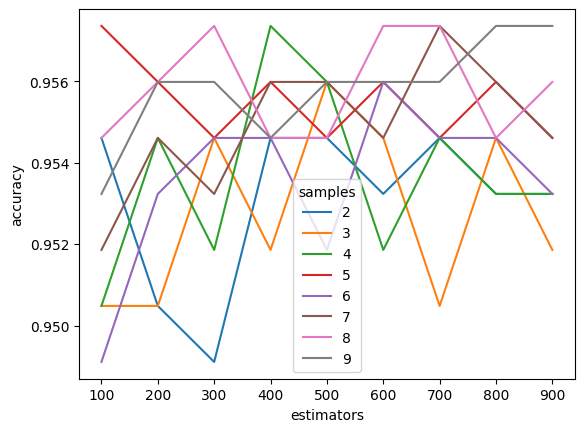

In [26]:
sns.lineplot(data = metrics_df, x="estimators", y="accuracy", hue = metrics_df["samples"].astype(str))

In [28]:
metrics_df.sort_values("accuracy").tail()

,samples,estimators,accuracy
54,8,700,0.957359
26,4,400,0.957359
46,8,600,0.957359
63,9,800,0.957359
71,9,900,0.957359


In [31]:
model = RandomForestClassifier()
space = dict()
space["min_samples_split"] = range(2,15)
space["n_estimators"] = range(500,1200,100)

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1)
result = search.fit(X, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9496341431066954
Best Hyperparameters: {'min_samples_split': 9, 'n_estimators': 800}
